Practical 9[A]: Stock Price Prediction using RNN Implement a simple form of a RNN

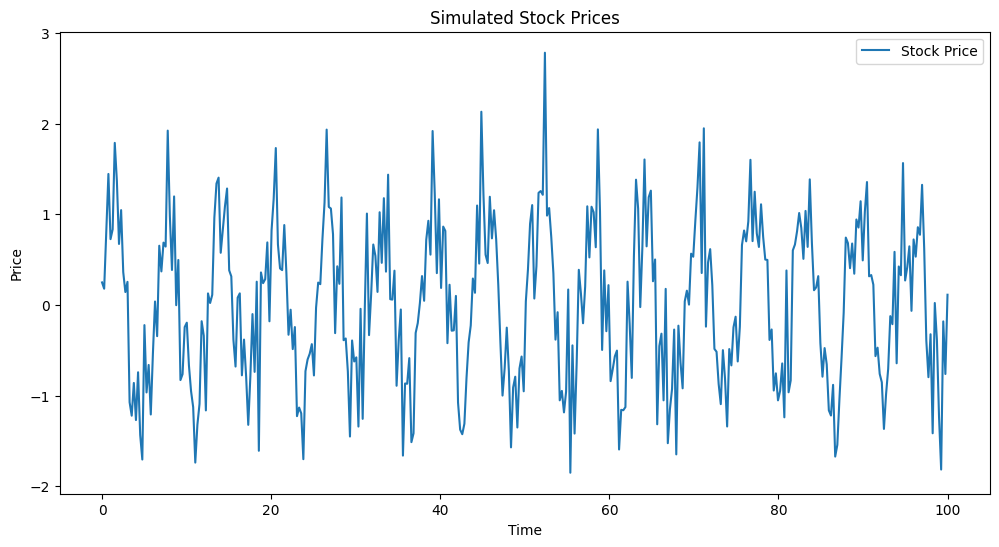

c:\Users\HEAVEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, loss: 0.48208
Epoch: 100, loss: 0.14921
Epoch: 200, loss: 0.14896
Epoch: 300, loss: 0.14893
Epoch: 400, loss: 0.14892
Epoch: 500, loss: 0.14891
Epoch: 600, loss: 0.14891
Epoch: 700, loss: 0.14891
Epoch: 800, loss: 0.14891
Epoch: 900, loss: 0.14891


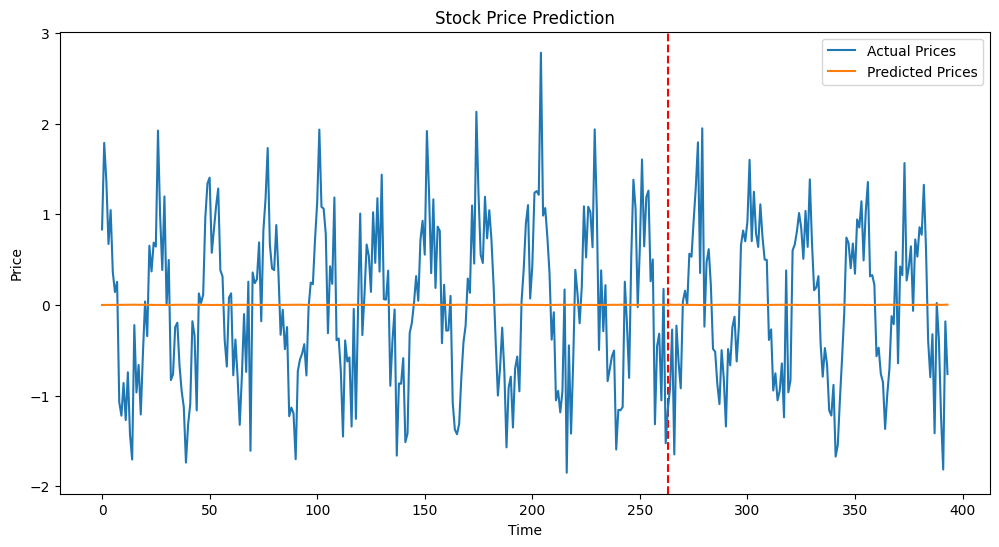

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable

#Simulate some stock prices
np.random.seed(42)
time_steps = np.linspace(0, 100, 400)
prices = np.sin(time_steps) + np.random.normal(scale=0.5, size=len(time_steps))


plt.figure(figsize=(12, 6))
plt.plot(time_steps, prices, label='Stock Price')
plt.title('Simulated Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

from sklearn.preprocessing import MinMaxScaler

#Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
prices_normalized = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

#Prepare the data for RNN
def sliding_windows(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length - 1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)
    return np.array(x), np.array(y)

seq_length = 5
x, y = sliding_windows(prices_normalized, seq_length)

#Split the data into train and test sets
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

#Define a simple RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
      h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
      out, _ = self.rnn(x, h0)
      out = self.fc(out[:, -1, :])
      return out

num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
output_size = 1

model = SimpleRNN(input_size, hidden_size, num_layers, output_size)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Train the model
for epochs in range(num_epochs):
    outputs = model(trainX.unsqueeze(-1))
    optimizer.zero_grad()

    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epochs % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epochs, loss.item()))

#make predictions
model.eval()
train_predict = model(dataX.unsqueeze(-1))
#Invert predections
data_predict = train_predict.data.numpy()
data_predict = scaler.inverse_transform(data_predict).flatten()
#Invert actual prices
actual_prices = scaler.inverse_transform(dataY.data.numpy().reshape(-1, 1)).flatten()
#Plot results
plt.figure(figsize=(12, 6))
plt.axvline(x=train_size, c='r', linestyle='--')
#plotting actual prices
plt.plot(actual_prices, label='Actual Prices')
plt.plot(data_predict, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Practical 9[B]: Using PyTorch

Using device: cpu


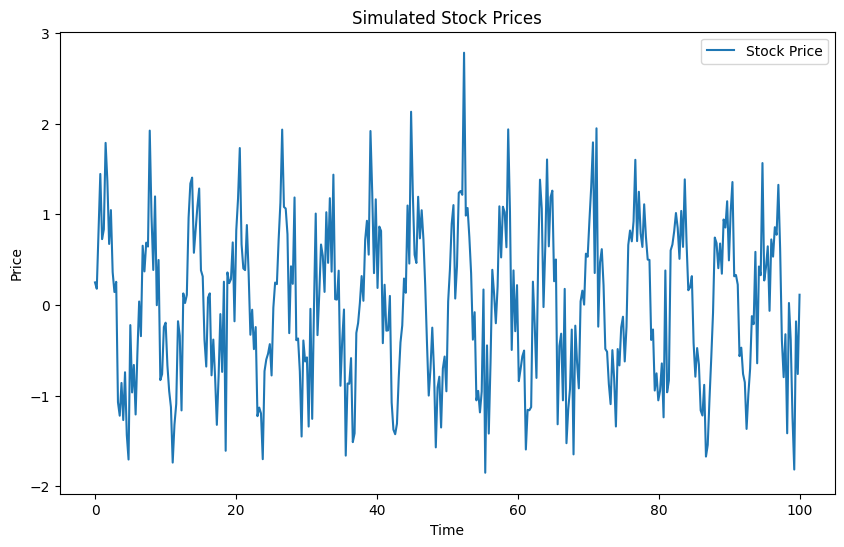

C:\Users\HEAVEN\AppData\Local\Temp\ipykernel_16412\2954422363.py:92: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler()
c:\Users\HEAVEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\HEAVEN\AppData\Local\Temp\ipykernel_16412\2954422363.py:100: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
c:\Users\HEAVEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch [0/500], Loss: 0.201757
Epoch [50/500], Loss: 0.062017
Epoch [100/500], Loss: 0.054589
Epoch [150/500], Loss: 0.053786
Epoch [200/500], Loss: 0.052423
Epoch [250/500], Loss: 0.049597
Epoch [300/500], Loss: 0.047109
Epoch [350/500], Loss: 0.041111
Epoch [400/500], Loss: 0.035447
Epoch [450/500], Loss: 0.027581


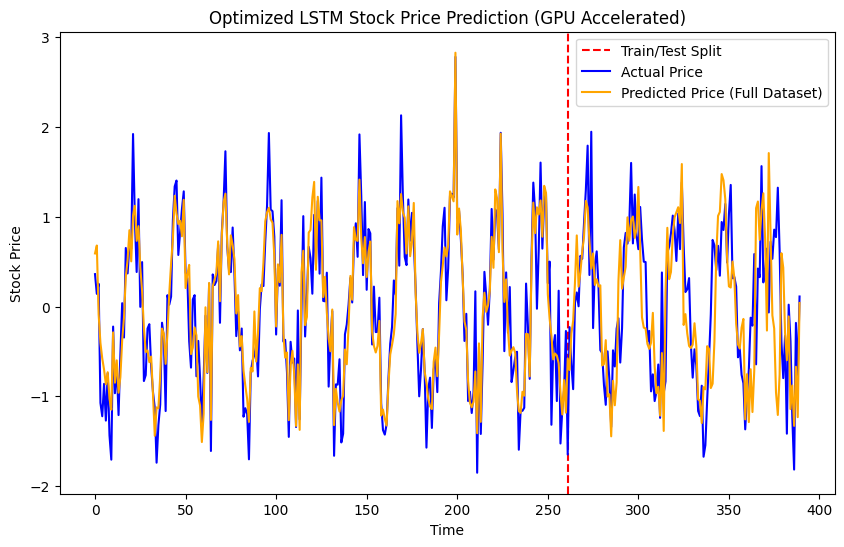

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Detect GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Simulate Stock Prices
np.random.seed(42)
time_steps = np.linspace(0, 100, 400)
prices = np.sin(time_steps) + np.random.normal(scale=0.5, size=len(time_steps))

# 2. Visualize Data
plt.figure(figsize=(10, 6))
plt.plot(time_steps, prices, label='Stock Price')
plt.title('Simulated Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3. Normalize Data
scaler = MinMaxScaler(feature_range=(-1, 1))
prices_normalized = scaler.fit_transform(prices.reshape(-1, 1))

# 4. Prepare Data (Sliding Window)
def sliding_windows(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 10  # Increased sequence length for better learning
x, y = sliding_windows(prices_normalized, seq_length)

# Convert to PyTorch tensors and move to GPU
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

batch_size = 64  # Increase batch size for better GPU utilization
# Create training and test sets
trainX = torch.Tensor(x[:train_size]).view(-1, seq_length, 1).to(device)
trainY = torch.Tensor(y[:train_size]).to(device)

testX = torch.Tensor(x[train_size:]).view(-1, seq_length, 1).to(device)
testY = torch.Tensor(y[train_size:]).to(device)

fullX = torch.Tensor(x).view(-1, seq_length, 1).to(device)  # For full dataset prediction

# 5. Define Optimized LSTM Model
class OptimizedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(OptimizedLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Enable cuDNN optimizations
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, bidirectional=False).to(device)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).detach()
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).detach()

            # Enable cuDNN optimization
            with torch.backends.cudnn.flags(enabled=True):
                out, _ = self.lstm(x, (h0, c0))

            out = self.fc(out[:, -1, :])  # Use last time step output
            return out

# 6. Set Hyperparameters
input_size = 1
hidden_size = 128  # Increased hidden size
num_layers = 3  # More layers for better learning
output_size = 1
num_epochs = 500  # Lower epochs due to larger batch size
learning_rate = 0.001

# 7. Initialize Model, Loss, and Optimizer
model = OptimizedLSTM(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Use mixed precision training (automatic mixed precision AMP)
scaler_amp = torch.cuda.amp.GradScaler()

# 8. Train Model with Mixed Precision
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Use automatic mixed precision for faster computation
    with torch.cuda.amp.autocast():
        outputs = model(trainX)
        loss = criterion(outputs, trainY)

    # Scale loss and backward pass
    scaler_amp.scale(loss).backward()

    # Clip gradients to avoid explosion
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    # Update weights
    scaler_amp.step(optimizer)
    scaler_amp.update()

    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.6f}")

# 9. Evaluate Model
model.eval()
with torch.no_grad():
    train_predict = model(trainX)
    test_predict = model(testX)
    full_predict = model(fullX)  # Predict for the entire dataset

# 10. Move Predictions Back to CPU
train_predict = scaler.inverse_transform(train_predict.cpu().numpy())
test_predict = scaler.inverse_transform(test_predict.cpu().numpy())
full_predict = scaler.inverse_transform(full_predict.cpu().numpy())

actual_prices = scaler.inverse_transform(y)

# 11. Plot Results
plt.figure(figsize=(10, 6))
plt.axvline(x=train_size, c='r', linestyle='--', label='Train/Test Split')

# Plot actual prices
plt.plot(actual_prices, label='Actual Price', color='blue') 

# Plot full dataset predictions
plt.plot(full_predict, label='Predicted Price (Full Dataset)', color='orange')

plt.title('Optimized LSTM Stock Price Prediction (GPU Accelerated)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()